## Time Series Analysis - based on climate change tweets

## Import Tweet Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#to plot within notebook
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# set maximun column size
pd.options.display.max_colwidth = 150

In [5]:
df=pd.read_csv('climate_change02.csv', sep='|')

In [6]:
df.shape

(78250, 13)

In [7]:
df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,retweet_user_name,retweet_name,text
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,NaN,NaN,@jemmaspatronus It was a stolen joke. As usual. https://t.co/gkG3t53wIj
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,NaN,NaN,@jwmkup @SuarezMiami Much of what is going on in society should be concerning to us all. There’s widespread injusti… https://t.co/HfdfHRaEyW
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,NewsNancy9,NEWSNANCY,RT @NewsNancy9: @J_a_l_i_USA Man-made climate change is a cover for the biggest heist in world history. People better wake up before they’…
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,tearfundaus,Tearfund Australia,"RT @tearfundaus: ""Any serious discipleship in these days needs to take climate change seriously."" - Rev Tim Costello AO. Download Tearfund…"
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,bapslosangeles,BAPS Los Angeles,RT @bapslosangeles: #BAPSLosAngeles and other @BAPS mandirs joined iconic landmarks by turning off our non-essential lights at 8:30 this…


# I have collected climate change tweets in April 2021. I will input that file and combine it with my current file. Please make sure both files has the same columns with the same order

In [23]:
df_2021=pd.read_csv('data\climatechange_202104.withHeader.csv', sep='|')

In [9]:
df_2021.shape

(1554479, 13)

In [10]:
df_2021.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,retweet_user_name,retweet_name,text
0,1388281994082095105,2021-04-30T23:59:55.000Z,Twitter for Android,en,DavidViczz,twofirstnames 🌻,Australia,169,596,NaN,NaN,NaN,@ripmetcard @JohnKennedyMP Right now there are about to be around 1 million cars sold in Aus it is preferable they be EVs to reduce pollution. MVs...
1,1388281957042343940,2021-04-30T23:59:46.000Z,Twitter for Android,en,anxiety_xcx,𝖓𝖚𝖈𝖑𝖊𝖆𝖗 𝖘𝖊𝖆𝖘𝖔𝖓𝖘 ❤️‍🔥,NaN,20,101,NaN,NaN,NaN,NFTs are so stupid ya'll be affecting climate change and for what? https://t.co/D68yGhfYiT
2,1388281927526912002,2021-04-30T23:59:39.000Z,Twitter Web App,fr,NatureRanger,Nature Ranger ❤🇺🇦,NaN,602,2662,2021-01-13T04:35:49.000Z,great_thunberg,Greta Thunberg News,RT @great_thunberg: Our hashtags: #SaveThePlanet #FridaysForFuture #GretaThunberg #ClimateStrike #GlobalWarming #ActNOWForFuture #FaceTh…
3,1388281908593889282,2021-04-30T23:59:34.000Z,Twitter Web App,en,deanbarker,Dean Barker,Слава Україні!,5659,1611,2021-04-30T23:50:43.000Z,ChrisCoons,Senator Chris Coons,RT @ChrisCoons: Did you know forests make up 29% of Delaware’s land? Not only are forests a beautiful part of our landscape and home to all…
4,1388281892722511874,2021-04-30T23:59:30.000Z,Twitter for iPhone,en,ASchmittner,Andreas Schmittner,Corvallis,1541,1046,NaN,NaN,NaN,John Kerry calls on scientists to lead fight against climate change denial Reuters https://t.co/f0rlLLCyVL


In [24]:
# join tweets in April 2021 with current tweets

df=pd.concat([df, df_2021])

In [12]:
df.shape

(1632729, 13)

In [15]:
#if you have a big dataset, you may use a random sample of your dataset. For class demonstration, I will use 30% of the data.
#PLEASE USE FULL DATASET FOR YOUR PROJECT

df=df.sample(frac=0.3)

In [16]:
df.shape

(146946, 13)

## Getting the structure of data

In [17]:
df.columns # list column names

Index(['tweet_id', 'created_at', 'source', 'lang', 'user_name', 'name',
       'user_location', 'user_followers_count', 'user_friends_count',
       'retweet_created_at', 'retweet_user_name', 'retweet_name', 'text'],
      dtype='object')

In [18]:
df.dtypes # list data type of each columns

tweet_id                 int64
created_at              object
source                  object
lang                    object
user_name               object
name                    object
user_location           object
user_followers_count     int64
user_friends_count       int64
retweet_created_at      object
retweet_user_name       object
retweet_name            object
text                    object
dtype: object

In [19]:
df.info()  # give an estimate of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146946 entries, 1514110 to 1227227
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   tweet_id              146946 non-null  int64 
 1   created_at            146946 non-null  object
 2   source                146946 non-null  object
 3   lang                  146946 non-null  object
 4   user_name             146946 non-null  object
 5   name                  146929 non-null  object
 6   user_location         102047 non-null  object
 7   user_followers_count  146946 non-null  int64 
 8   user_friends_count    146946 non-null  int64 
 9   retweet_created_at    107242 non-null  object
 10  retweet_user_name     107242 non-null  object
 11  retweet_name          107240 non-null  object
 12  text                  146946 non-null  object
dtypes: int64(3), object(10)
memory usage: 15.7+ MB


In [20]:
df.describe() # show the statistics for numerical columns

,tweet_id,user_followers_count,user_friends_count
count,1.469460e+05,1.469460e+05,146946.000000
mean,1.389408e+18,3.080129e+04,2345.780498
std,2.768238e+16,6.885004e+05,6951.614825
min,1.376833e+18,0.000000e+00,0.000000
25%,1.380820e+18,1.990000e+02,318.000000
50%,1.384207e+18,7.340000e+02,907.000000
75%,1.385714e+18,2.528750e+03,2548.750000
max,1.510986e+18,5.778759e+07,598499.000000


In [21]:
# add a column showing the length of a tweet text

df['tweet_length']=df['text'].str.len()

In [22]:
df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,retweet_user_name,retweet_name,text,tweet_length
1514110,1377067017883148291,2021-03-31T01:15:36.000Z,Twitter Web App,en,schneidermayers,Matthew Schneider-Mayerson,Singapore,1556,1349,2021-03-29T13:58:13.000Z,schneidermayers,Matthew Schneider-Mayerson,RT @schneidermayers: I hope to add to the discourse by building on the emergent concept of ‘climate people’ to introduce the category of CL…,140
1507162,1377166536855539713,2021-03-31T07:51:03.000Z,Twitter for iPad,en,sdunne45,Sharon Dunne,NaN,1251,1119,NaN,NaN,NaN,"@seanmccarthaigh @ob1orla The people who left this rubbish will usually be the green brigade, screaming about climate change &amp; saving the planet.",149
38878,1510824902638587905,Mon Apr 04 03:41:41 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",en,ThtEnbyUEnvy,Demiboy🎀Achilles (Feucoco Lover Arc),doin ur mom & ur dad,91,288,NaN,NaN,NaN,"can't punch climate change."" I feel like it's implying we gotta do something about that... ... and like... yeah no… https://t.co/U9B7Gb1q0Y",140
1123050,1381226240355536898,2021-04-11T12:42:52.000Z,Twitter for Android,en,HamptonHill6,Hampton Hill,NaN,267,487,NaN,NaN,NaN,"@viviandsample @buxom9412 @thedailybeast Were you a ""we're running out of oil"" fanatic? A ""population bomb"" fanatic? A ""we're going into an ice ag...",300
595371,1384961311726055438,2021-04-21T20:04:42.000Z,Twitter for iPhone,en,ChrisZiesler,Chris Ziesler,"Chicago, IL",407,787,2021-04-21T20:02:28.000Z,dankd,Daniel Kirk-Davidoff,RT @dankd: @ChrisZiesler and I had a great conversation with @DeigninSpain about the impacts of climate change on renewable energy in the…,139


In [23]:
df['tweet_length'].describe()

count    146946.000000
mean        150.895683
std          56.259491
min           1.000000
25%         139.000000
50%         140.000000
75%         140.000000
max         972.000000
Name: tweet_length, dtype: float64

In [26]:
# summay statiscis for non-numerical columns

df[['source', 'lang', 'user_location']].describe(include='O').T

,count,unique,top,freq
source,146946,927,Twitter for iPhone,41602
lang,146946,51,en,140748
user_location,102047,33964,United States,1706


## Checking for Missing Data

In [27]:
df.isna().sum()

tweet_id                    0
created_at                  0
source                      0
lang                        0
user_name                   0
name                       17
user_location           44899
user_followers_count        0
user_friends_count          0
retweet_created_at      39704
retweet_user_name       39704
retweet_name            39706
text                        0
tweet_length                0
dtype: int64

In [28]:
len(df)

146946

In [29]:
# find the percent of missing values in each column

df.isna().sum()/len(df)

tweet_id                0.000000
created_at              0.000000
source                  0.000000
lang                    0.000000
user_name               0.000000
name                    0.000116
user_location           0.305548
user_followers_count    0.000000
user_friends_count      0.000000
retweet_created_at      0.270194
retweet_user_name       0.270194
retweet_name            0.270208
text                    0.000000
tweet_length            0.000000
dtype: float64

In [30]:
# for the user location, fill missing value with "NA"

df['user_location'].fillna("NA", inplace=True)

df.isna().sum()

## Visualzing Sentiment over time

Please be aware that the dataset I used is not ideal since the tweets are not collected on a continuous time period.

In [31]:
# Calculate sentiment 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = []
analyzer = SentimentIntensityAnalyzer()

for index, row in df.iterrows():
    tweet = str(row['text'])
    vs = analyzer.polarity_scores(tweet)
    sentiment.append(vs)
    
df['VaderSentiment'] = sentiment

# extract compound value for the VaderSentiment

df['compound']=df['VaderSentiment'].apply(pd.Series)['compound']

df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,retweet_user_name,retweet_name,text,tweet_length,VaderSentiment,compound
1514110,1377067017883148291,2021-03-31T01:15:36.000Z,Twitter Web App,en,schneidermayers,Matthew Schneider-Mayerson,Singapore,1556,1349,2021-03-29T13:58:13.000Z,schneidermayers,Matthew Schneider-Mayerson,RT @schneidermayers: I hope to add to the discourse by building on the emergent concept of ‘climate people’ to introduce the category of CL…,140,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.4404}",0.4404
1507162,1377166536855539713,2021-03-31T07:51:03.000Z,Twitter for iPad,en,sdunne45,Sharon Dunne,NA,1251,1119,NaN,NaN,NaN,"@seanmccarthaigh @ob1orla The people who left this rubbish will usually be the green brigade, screaming about climate change &amp; saving the planet.",149,"{'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.3818}",-0.3818
38878,1510824902638587905,Mon Apr 04 03:41:41 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",en,ThtEnbyUEnvy,Demiboy🎀Achilles (Feucoco Lover Arc),doin ur mom & ur dad,91,288,NaN,NaN,NaN,"can't punch climate change."" I feel like it's implying we gotta do something about that... ... and like... yeah no… https://t.co/U9B7Gb1q0Y",140,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.7351}",0.7351
1123050,1381226240355536898,2021-04-11T12:42:52.000Z,Twitter for Android,en,HamptonHill6,Hampton Hill,NA,267,487,NaN,NaN,NaN,"@viviandsample @buxom9412 @thedailybeast Were you a ""we're running out of oil"" fanatic? A ""population bomb"" fanatic? A ""we're going into an ice ag...",300,"{'neg': 0.082, 'neu': 0.887, 'pos': 0.032, 'compound': -0.5514}",-0.5514
595371,1384961311726055438,2021-04-21T20:04:42.000Z,Twitter for iPhone,en,ChrisZiesler,Chris Ziesler,"Chicago, IL",407,787,2021-04-21T20:02:28.000Z,dankd,Daniel Kirk-Davidoff,RT @dankd: @ChrisZiesler and I had a great conversation with @DeigninSpain about the impacts of climate change on renewable energy in the…,139,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.7351}",0.7351


In [32]:
df.dtypes

tweet_id                  int64
created_at               object
source                   object
lang                     object
user_name                object
name                     object
user_location            object
user_followers_count      int64
user_friends_count        int64
retweet_created_at       object
retweet_user_name        object
retweet_name             object
text                     object
tweet_length              int64
VaderSentiment           object
compound                float64
dtype: object

In [33]:
# convert created_at to datetime format

df['created_at']=pd.to_datetime(df['created_at'])

df.dtypes

tweet_id                              int64
created_at              datetime64[ns, UTC]
source                               object
lang                                 object
user_name                            object
name                                 object
user_location                        object
user_followers_count                  int64
user_friends_count                    int64
retweet_created_at                   object
retweet_user_name                    object
retweet_name                         object
text                                 object
tweet_length                          int64
VaderSentiment                       object
compound                            float64
dtype: object

In [40]:
# you may use below functions to extract date, year, month, week, weekday, hour from a timestamp

df['date']=df['created_at'].dt.date
df['year']=df['created_at'].dt.year
df['month']=df['created_at'].dt.month
df['week']=df['created_at'].dt.week
#df['day_name']=df['created_at'].dt.day_name()
df['weekday']=df['created_at'].dt.weekday
df['hour']=df['created_at'].dt.hour

df.head()

C:\Users\sli\AppData\Local\Temp/ipykernel_23636/3268600071.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week']=df['created_at'].dt.week


,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,tweet_length,VaderSentiment,compound,date,year,month,week,day_name,hour,weekday
1514110,1377067017883148291,2021-03-31 01:15:36+00:00,Twitter Web App,en,schneidermayers,Matthew Schneider-Mayerson,Singapore,1556,1349,2021-03-29T13:58:13.000Z,...,140,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.4404}",0.4404,2021-03-31,2021,3,13,Wednesday,1,2
1507162,1377166536855539713,2021-03-31 07:51:03+00:00,Twitter for iPad,en,sdunne45,Sharon Dunne,NA,1251,1119,NaN,...,149,"{'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compound': -0.3818}",-0.3818,2021-03-31,2021,3,13,Wednesday,7,2
38878,1510824902638587905,2022-04-04 03:41:41+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",en,ThtEnbyUEnvy,Demiboy🎀Achilles (Feucoco Lover Arc),doin ur mom & ur dad,91,288,NaN,...,140,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.7351}",0.7351,2022-04-04,2022,4,14,Monday,3,0
1123050,1381226240355536898,2021-04-11 12:42:52+00:00,Twitter for Android,en,HamptonHill6,Hampton Hill,NA,267,487,NaN,...,300,"{'neg': 0.082, 'neu': 0.887, 'pos': 0.032, 'compound': -0.5514}",-0.5514,2021-04-11,2021,4,14,Sunday,12,6
595371,1384961311726055438,2021-04-21 20:04:42+00:00,Twitter for iPhone,en,ChrisZiesler,Chris Ziesler,"Chicago, IL",407,787,2021-04-21T20:02:28.000Z,...,139,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.7351}",0.7351,2021-04-21,2021,4,16,Wednesday,20,2


In [35]:
df.groupby('date')['date'].count()

date
2021-03-30     3663
2021-03-31     3728
2021-04-01     3244
2021-04-02     2461
2021-04-03     2868
2021-04-04     2156
2021-04-05     2449
2021-04-06     3136
2021-04-07     3351
2021-04-08     4443
2021-04-09     4187
2021-04-10     2570
2021-04-11     2463
2021-04-12     3225
2021-04-13     5918
2021-04-14     5553
2021-04-15     4889
2021-04-16     4020
2021-04-17     2403
2021-04-18     3205
2021-04-19     5261
2021-04-20     6739
2021-04-21     5798
2021-04-22    14301
2021-04-23     8762
2021-04-24     4642
2021-04-25     4024
2021-04-26     4420
2021-04-27     4775
2021-04-28     4199
2021-04-29     4305
2021-04-30     2589
2022-03-28      214
2022-03-29      444
2022-04-03     1701
2022-04-04     4840
Name: date, dtype: int64

<AxesSubplot:title={'center':'Number of Tweets by date'}, xlabel='date'>

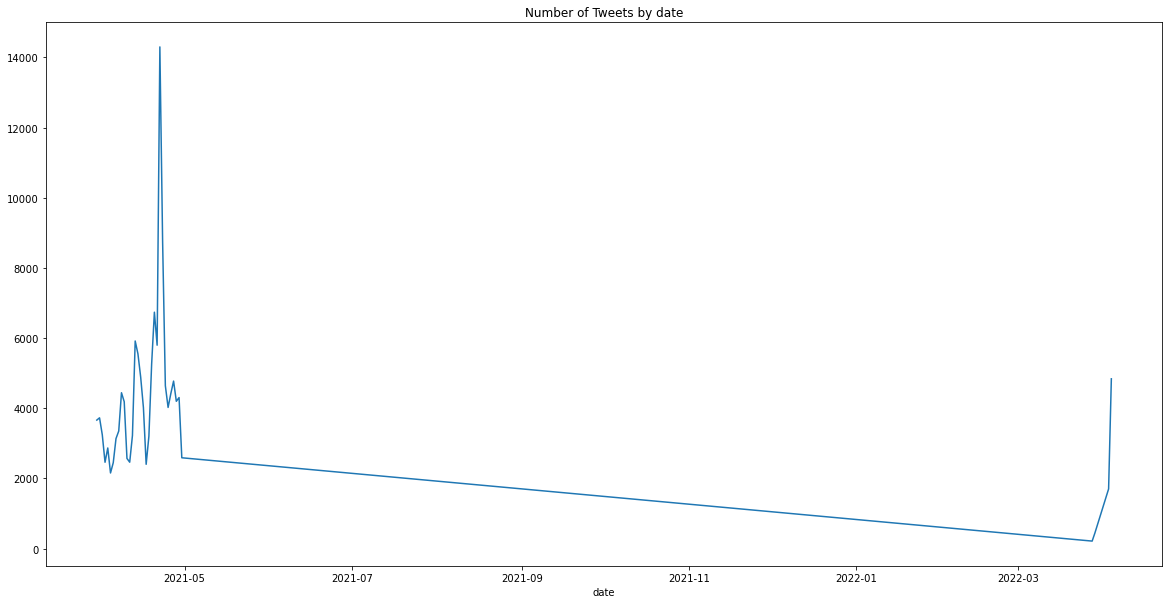

In [51]:
# show number of tweets by date

df.groupby('date')['date'].count().plot(title="Number of Tweets by date")

Text(0.5, 1.0, 'Number of Tweets by Week Day')

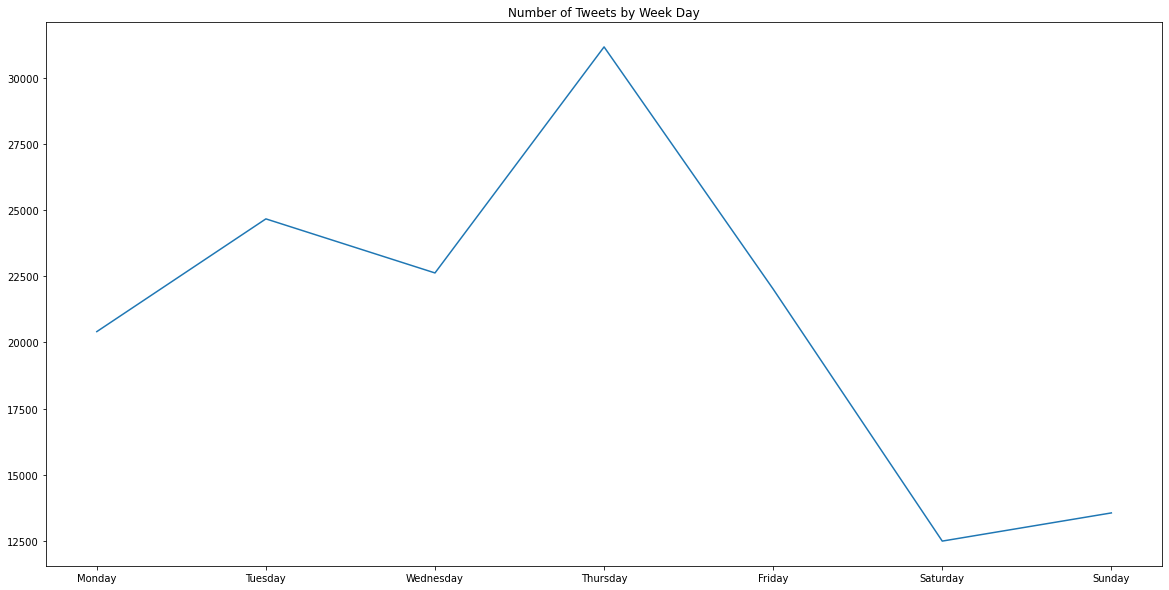

In [50]:
# show number of tweets by weekday

weekday_name=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

weekday_df=df.groupby('weekday')['tweet_id'].count().reset_index(name="NumTweets")

weekday_df['weekday_name']=weekday_name

import matplotlib.pyplot as plt

plt.plot(weekday_df['weekday_name'], weekday_df['NumTweets'])
plt.title('Number of Tweets by Week Day')


<AxesSubplot:title={'center':'Average Sentiment by date'}, xlabel='date'>

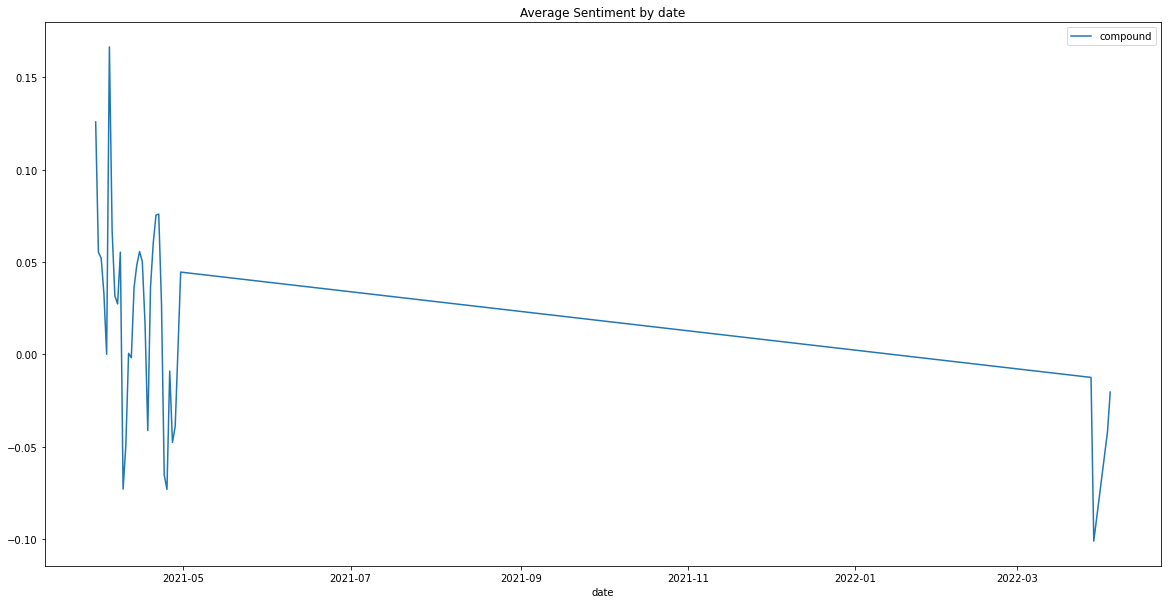

In [52]:
# show average sentiment by date

df.groupby('date').agg({'compound': 'mean'}) \
.plot(title="Average Sentiment by date")

## Top 10 Users by Number of Tweets by year

In [53]:
top10ByYear=df.groupby(['year', 'user_name'])['tweet_id'].count().reset_index(name="numTweets").sort_values('numTweets', ascending=False)

top10ByYear['rank']=top10ByYear.groupby('year')['numTweets'].rank(ascending=False).astype(int)

top10_final=top10ByYear[top10ByYear['rank']<=10]

top10_final.head(20)

,year,user_name,numTweets,rank
18740,2021,FFFBot1,265,1
104578,2021,trvestuff,170,2
66235,2021,carboncompanies,127,3
78349,2021,imagine_garden,111,4
54178,2021,TinTincognito,110,5
25743,2021,JFSebastian146,107,6
17220,2021,Eco1stArt,96,7
7164,2021,BetterknowYou,75,8
47705,2021,SaleemulHuq,70,9
79556,2021,jane__eden,64,10


## [Choose a color palettes in seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)

<AxesSubplot:xlabel='numTweets', ylabel='user_name'>

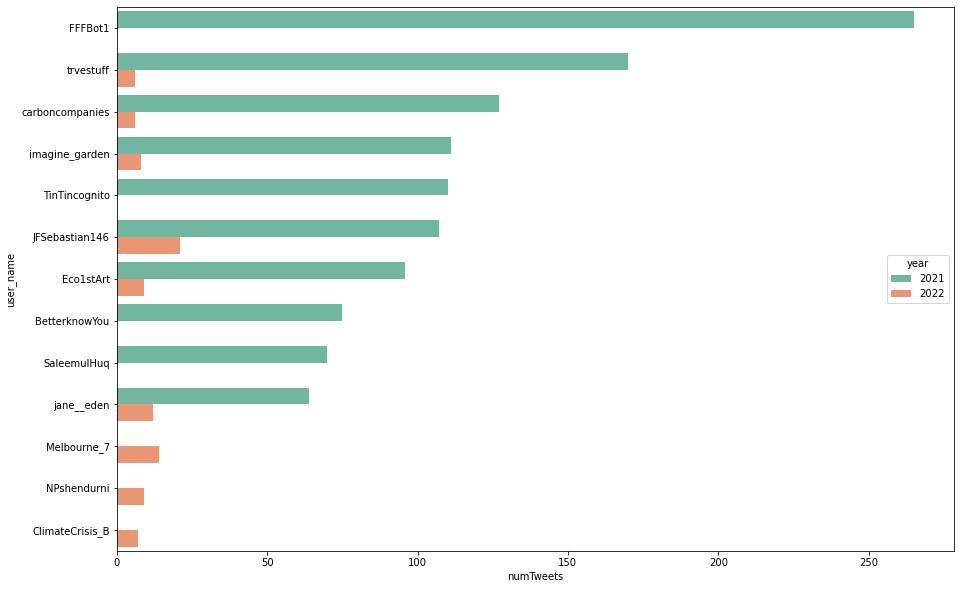

In [54]:
# visualize the result

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the figure size
plt.figure(figsize=(15,10))

# Using categorical Color Brewer palettes
palette=sns.color_palette("Set2")

# plot a bar chart
sns.barplot(
    x="numTweets", 
    y="user_name", 
    hue="year",
    data=top10_final, 
    palette=palette)

## Top 10 Users by Number of Retweets by year

In [55]:
top10ByYear=df.groupby(['year', 'retweet_user_name'])['tweet_id'].count().reset_index(name="numRetweets").sort_values('numRetweets', ascending=False)

top10ByYear['rank']=top10ByYear.groupby('year')['numRetweets'].rank(ascending=False).astype(int)

top10_final=top10ByYear[top10ByYear['rank']<=10]

top10_final.head(20)

,year,retweet_user_name,numRetweets,rank
7927,2021,POTUS,2797,1
16194,2021,mikepompeo,1517,2
14365,2021,georgixlouisex,1328,3
16586,2021,notsoaidil,1068,4
5023,2021,ImranKhanPTI,1029,5
4492,2021,GretaThunberg,939,6
8139,2021,PeterStefanovi2,875,7
17313,2021,robreiner,861,8
1852,2021,COP26,850,9
5037,2021,Independent,840,10


<AxesSubplot:xlabel='numRetweets', ylabel='retweet_user_name'>

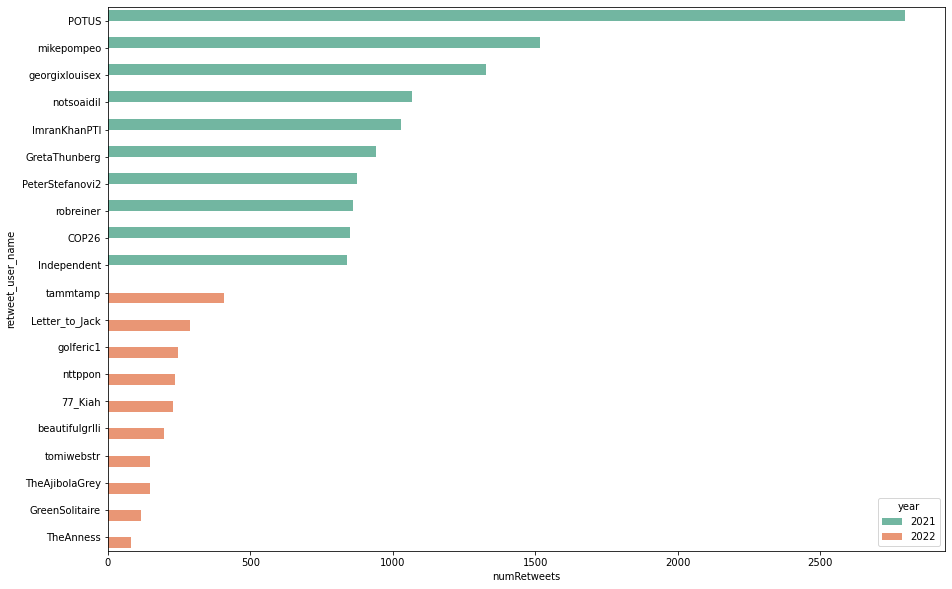

In [56]:
# visualize the result

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the figure size
plt.figure(figsize=(15,10))

# Using categorical Color Brewer palettes
palette=sns.color_palette("Set2")

# plot a bar chart
sns.barplot(
    x="numRetweets", 
    y="retweet_user_name", 
    hue="year",
    data=top10_final, 
    palette=palette)

## Look at particular keyword by time

In [35]:
# use full dataset

df=pd.read_csv('climate_change02.csv', sep='|')
df_2021=pd.read_csv('data\climatechange_202104.withHeader.csv', sep='|')

# join tweets in April 2021 with current tweets

df=pd.concat([df, df_2021])

In [41]:
# define a function to create a column showing whether a tweet includes a keyword
import re

def create_column_by_keyword(df, keyword):
    result=[]
    for tweet in list(df['text']):
        if re.match(keyword, tweet, re.IGNORECASE) is not None:
            result.append(1)
        else:
            result.append(0)
        
    df[keyword]=result

In [61]:
# create a column based on keyword

keyword="food"
create_column_by_keyword(df,keyword)

In [57]:
# check number of tweets in keyword
df[keyword].value_counts()

0    1632580
1        149
Name: food, dtype: int64

In [58]:
# check tweets including keywords

df[df[keyword]==1]['text']

27883               Food Water Shelter  Right Wing Economics is failing/has failed the WORLD over…   WE’RE sold a DREAM - ITS turned in… https://t.co/aG1DSN9L1B
36416               Food is a major contributor to climate change – 50% of the land used for agriculture today is for animal farming an… https://t.co/t6MDaSepT7
47687                      Food and Agriculture Organization is hiring a Climate Change Specialist. https://t.co/3DYiKaTQxo #jobstalent… https://t.co/ZM9wW9ec1o
10480      Food website @epicurious recently announced it would be ditching #beefrecipes in an effort to encourage more #sustainable consumption among its re...
14538      Food insecurity is a major issue in India. Climate change further exacerbates the problem. Extreme weather can contribute to the development of cr...
                                                                                   ...                                                                          
1499483    Food waste is a global 